<a href="https://colab.research.google.com/github/mssomie/Deep-Neural-Network/blob/main/Concrete_Strength_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an Artificial Neural Network from Scratch


In [180]:
import random
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define activation functions

### Linear function

In [131]:
def linear_function(x):
    function =x
    return function

Logistics Function

In [278]:
def logisitics_function (x):
  return 1/(1+np.exp(-x))


RELU Function


In [279]:
def RELU(x):
  return np.maximum(0,x)


Hyperbolic Function

In [280]:
def hyberbolic_tangent(x):
    function = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    derivative = 1 - function ** 2
    return function, derivative

In [281]:
print(logisitics_function(10))
print(RELU(10))
print(hyberbolic_tangent(10))

0.9999546021312976
10
(0.9999999958776926, 8.244614768671e-09)


# Define Fitness Function


In [181]:
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [182]:
# Define fitness to be a measure of how good the model is
def fitness(y_true, y_pred):
    return 1/MSE(y_true, y_pred)

# Get Data

In [284]:
# Get dataset
url = "https://archive.ics.uci.edu/static/public/165/concrete+compressive+strength.zip"
response = requests.get(url)
with open("concrete_strength.zip", "wb") as file:
    file.write(response.content)

In [285]:
# Unzip dataset
!unzip concrete_strength.zip 

Archive:  concrete_strength.zip
replace Concrete_Data.xls? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [183]:
# Load data into dataframe
concrete_data = pd.read_excel(r"Concrete_Data.xls")

# View first five entries
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [184]:
# Check data information
print(concrete_data.shape)
concrete_data.info()

(1030, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, mega

In [185]:
# view summary statistics
concrete_data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# Data Preprocessing

In [186]:
# Check for missing data
concrete_data.isnull().any().sum()

0

In [187]:
# Check for duplicates
print(concrete_data.duplicated().any())
print("Number of duplicate rows:", concrete_data.duplicated().sum())
duplicate_rows = concrete_data[concrete_data.duplicated()]
duplicate_rows

True
Number of duplicate rows: 25


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [188]:
# Handle Duplicates
concrete_data.drop_duplicates(inplace = True)
print(concrete_data.duplicated().any())

False


**Split Data Into Training and Testing Sets**


In [189]:
x = concrete_data.drop(['Concrete compressive strength(MPa, megapascals) '], axis=1)
y = concrete_data['Concrete compressive strength(MPa, megapascals) ']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=7)

In [190]:
# Standardise values
s_scaler = StandardScaler()
x_train_scaled= s_scaler.fit_transform(x_train)
x_test_scaled= s_scaler.fit_transform(x_test)

# Network


In [191]:
# TODO: fix for multiple hidden layers
class Multilayer_perceptron:

   # Initialize ANN
   def __init__(self, hidden_layers_neurons, activation_function, activation_function_output=linear_function, input_layer_neurons=8,  output_layer_neuron=1, bias_input =1):
       self.input_layer_neurons = input_layer_neurons
       self.hidden_layers_neurons = hidden_layers_neurons
       self.output_layer_neuron = output_layer_neuron
       self.weight = []
       self.bias = []

       self.activation_function = activation_function
       self.activation_function_output = activation_function_output

       # Input layer to hidden layer
       self.weight.append(np.random.rand(hidden_layers_neurons[0],input_layer_neurons))
       self.bias.append(np.random.rand(hidden_layers_neurons[0],bias_input))

      # Hidden layer to hidden layer
       for i in range(1, len(hidden_layers_neurons)):
        self.weight.append(np.random.rand(hidden_layers_neurons[i], hidden_layers_neurons[i-1]))
        self.bias.append(np.random.rand(hidden_layers_neurons[i], bias_input))


       # Hidden layer to output layer
       self.weight.append(np.random.rand(output_layer_neuron,hidden_layers_neurons[-1]))
       self.bias.append(np.random.rand(output_layer_neuron,bias_input))

    # Set the weights and biases based on the PSO's particles
   def set_weights(self, particle):

       total_weights=0
       total_biases=-0

    #    Count weight and biases for each layer
       for i in range(len(self.weight)):
          total_weights += np.prod(self.weight[i].shape)
          total_biases += np.prod(self.bias[i].shape)

    # Ensure the particle has the correct size
       if len(particle) != total_weights + total_biases:
            raise ValueError("Particle size does not match number of weight and bises. Particle =", len(particle), "sum of both:", total_weights + total_biases)
       
    #If the particle has the correct size, update the weights
       start =0
       for i in range(len(self.weight)):
           weight_shape = self.weight[i].shape
           end = start + np.prod(weight_shape)
           self.weight[i] = particle[start: end].reshape(weight_shape)
           start = end
           
           
        
        #Also update the biases
       for i in range(len(self.bias)):
           bias_shape = self.bias[i].shape
           end = start + np.prod(bias_shape)
           self.bias[i] = particle[start: end].reshape(bias_shape)
           start = end
           
           

        
    

   def forward_pass(self, input):
        # Make input a 2D array
        input = np.array(input)

       # using Z = Wx + b
        z_hidden=[]
        a_hidden=[]
        for i in range(len(self.weight)):
            if i == 0:
                z = np.dot(input, self.weight[i].T) + self.bias[i].T
            else:
                z = np.dot(a_hidden[i-1], self.weight[i].T) + self.bias[i].T
            z_hidden.append(z)


            # Apply activate function to all layers except the output layer
            if i < len(self.weight)-1:
                a_hidden.append(self.activation_function(z))
            else:
                a_hidden.append(self.activation_function_output(z))
            

        return a_hidden[-1]
   
  

In [192]:
# Define a function to dynamically calculate the number of dimensions for out PSO
def calculate_dimensions(input_layer, hidden_layers, output_layer):
    dimensions = 0

    # Add input->hidden layer weights
    dimensions += input_layer * hidden_layers[0] 
    # Add input->hidden layer biases
    dimensions += hidden_layers[0]

    # Add weights and biases between hidden layers
    for i in range(1, len(hidden_layers)):
        dimensions += hidden_layers[i-1] * hidden_layers[i]
        dimensions += hidden_layers[i]

    # Add weights add biases from last hidden layer to output layer
    dimensions += hidden_layers[-1] * output_layer
    dimensions += output_layer


    return dimensions


In [193]:

def assess_fitness(MLP, x_train_scaled, y_train):
      #TODO: Do we remove the particle from this function?

      y_pred = MLP.forward_pass(x_train_scaled)
      y_pred = y_pred.flatten()
      
      # using MSE
      mse= np.mean((y_train - y_pred) ** 2)
      mae= np.mean(np.abs(y_train - y_pred))
      
      # Since PSO is a maximizing algorithm, return the negation of MSE
      # fitness = 1/mse
      return mae


**Particle Swarm Optimization**

In [ ]:
class Particle_Swarm_Optimization:
    def __init__(self, swarm_size, dimensions, mlp, fitness_function, alpha, beta, gamma, delta, epsilon):
        self.swarm_size = swarm_size
        self.dimensions = dimensions
        self.mlp = mlp
        self.fitness_function = fitness_function
        self.particles_fittest = []
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.delta = delta
        self.epsilon = epsilon
        

      # Define a function to evaluate the fitness of a particle
    def evaluate_fitness(self, particle, predictor, target):
        self.mlp.set_weights(particle)
        return self.fitness_function(self.mlp, predictor, target)

    

    def initialize_swarm(self):
        # Initialize the particles with random positions
        self.particles = np.random.rand(self.swarm_size, self.dimensions)
        initial_fitness_values = np.array(assess_fitness(x) for x in self.particles)

        # Initialize the personal best positions as the particles' initial positions
        self.personal_best_positions = self.particles.copy()
        self.global_best_position = self.particles[0].copy()
        self.informants_best_position = self.particles.copy()

        # Initialize persobal and global fitness scores
        #TODO: Make sense of this. consider changing
        self.personal_best_scores = [self.evaluate_fitness(x, x_train_scaled, y_train) for x in self.personal_best_positions]
        self.global_best_score = self.evaluate_fitness(self.global_best_position, x_train_scaled, y_train)

        
        # Initialize particle velocity  using v = x(t) - x(t−1)
        for i in range (self.swarm_size):
            self.point_a= np.random.rand(self.swarm_size, self.dimensions)
            self.point_b= np.random.rand(self.swarm_size, self.dimensions)
            self.vector= self.point_b- self.point_a
            self.velocities = self.vector* 1/2
        pass

  
    def update_fitness(self, x, y):
        # TODO: change the name of this function to something more fitting
        # Update the personal best position if the current particle has a higher fitness value
        for i, val_i in enumerate(self.particles):
            

            particle_fitness = self.evaluate_fitness(val_i, x, y)
            

            if particle_fitness < self.personal_best_scores[i]:
                self.personal_best_scores[i] = particle_fitness
                self.personal_best_positions[i] = val_i
        # Update the global best position if the fitness of the personal best has a higher value
            if particle_fitness < self.global_best_score:
                self.global_best_score = particle_fitness
                self.global_best_position = val_i
        return  

    # Select informants for each particle and return the best informant
    def informants_best(self, particle_index, informants_count=5):
        # Get the indices of all particles except current particle and randomly choose informants_count-1 particles
        other_indices = np.array([i for i in range(self.swarm_size) if i != particle_index])
        chosen_indices = np.random.choice(other_indices, size =informants_count-1, replace=False)

        # Add the particle itself as one of the informants
        chosen_indices = np.append(chosen_indices, particle_index)

        # Get the index of the informant with the highest fitness
        informants_best = max(chosen_indices, key=lambda x: self.evaluate_fitness(self.personal_best_positions[x]))
        return self.personal_best_positions[informants_best]



    def update_velocity(self):
        # using vi ← αvi+b(xi∗−xi)+c(xi+−xi)+d(xi!−xi)
        for i in range (self.swarm_size):
            r1, r2, r3 = np.random.rand() , np.random.rand() ,  np.random.rand() 
            initial_velocity = self.alpha * self.velocities[i] 
            personal_velocity = self.beta * (self.personal_best_positions[i] - self.particles[i])
            informants_velocity = self.gamma * (self.informants_best_position[i] - self.particles[i] )
            global_velocity = self.delta * (self.global_best_position- self.particles[i])
            self.velocities[i] = initial_velocity + (r1 * personal_velocity) + (r2 * informants_velocity)+ (r3* global_velocity)


    def update_position(self ):
        # Using x ← x + ε v
        for i in range(self.swarm_size):
            self.particles[i] = self.particles[i] + (self.epsilon * self.velocities[i])
        

    def optimize(self, x, y, max_iterations):
        self.initialize_swarm()
        

        for i in range(max_iterations):
            print(f"Iteration {i+1}/{max_iterations}")

            self.update_fitness(x,y)
            self.update_velocity()
            self.update_position()
            
            print ('iteration ', i, self.global_best_score)

        # Set weights of the MLP to the global best at the end of each iteration
        self.mlp.set_weights(self.global_best_position)
        return self.global_best_position, self.global_best_score
    

    

    
        


In [211]:
MLP = Multilayer_perceptron(hidden_layers_neurons= [128],activation_function=logisitics_function)
dimensions = calculate_dimensions(MLP.input_layer_neurons, MLP.hidden_layers_neurons, MLP.output_layer_neuron)
PSO = Particle_Swarm_Optimization(swarm_size = 30, dimensions=dimensions, mlp = MLP, fitness_function=assess_fitness, alpha = 1.5, beta = 1.5, gamma = 0.7, delta = 0.1, epsilon=0.1)
best_position, best_score = PSO.optimize(x=x_train_scaled,y= y_train, max_iterations=100)

print("Best position: ", best_position, "best score ", best_score)




Iteration 1/100
iteration  0 11.126717846243025
Iteration 2/100
iteration  1 11.103598210434741
Iteration 3/100
iteration  2 11.008439621798756
Iteration 4/100
iteration  3 10.848747085811455
Iteration 5/100
iteration  4 10.631882346187497
Iteration 6/100
iteration  5 10.358165736593715
Iteration 7/100
iteration  6 10.078868170545212
Iteration 8/100
iteration  7 10.015371823329948
Iteration 9/100
iteration  8 10.015371823329948
Iteration 10/100
iteration  9 10.015371823329948
Iteration 11/100
iteration  10 10.015371823329948
Iteration 12/100
iteration  11 10.015371823329948
Iteration 13/100
iteration  12 10.015371823329948
Iteration 14/100
iteration  13 9.883767124866031
Iteration 15/100
iteration  14 9.883767124866031
Iteration 16/100
iteration  15 9.883767124866031
Iteration 17/100
iteration  16 9.883767124866031
Iteration 18/100
iteration  17 9.883767124866031
Iteration 19/100
iteration  18 9.745344762765619
Iteration 20/100
iteration  19 9.745344762765619
Iteration 21/100
iteration

/var/folders/mf/m37hd_vx2rd4zv4xvglmn6km0000gn/T/ipykernel_40125/1368158365.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


iteration  26 9.745344762765619
Iteration 28/100
iteration  27 9.745344762765619
Iteration 29/100
iteration  28 9.745344762765619
Iteration 30/100
iteration  29 9.745344762765619
Iteration 31/100
iteration  30 9.745344762765619
Iteration 32/100
iteration  31 9.745344762765619
Iteration 33/100
iteration  32 9.745344762765619
Iteration 34/100
iteration  33 9.745344762765619
Iteration 35/100
iteration  34 9.745344762765619
Iteration 36/100
iteration  35 9.745344762765619
Iteration 37/100
iteration  36 9.745344762765619
Iteration 38/100
iteration  37 9.745344762765619
Iteration 39/100
iteration  38 9.745344762765619
Iteration 40/100
iteration  39 9.745344762765619
Iteration 41/100
iteration  40 9.745344762765619
Iteration 42/100
iteration  41 9.745344762765619
Iteration 43/100
iteration  42 9.745344762765619
Iteration 44/100
iteration  43 9.745344762765619
Iteration 45/100
iteration  44 9.745344762765619
Iteration 46/100
iteration  45 9.745344762765619
Iteration 47/100
iteration  46 9.7453

In [218]:
print("X train scaled", x_train_scaled.shape)
assess_fitness(MLP, x_train_scaled, y_train)



X train scaled (703, 8)


/var/folders/mf/m37hd_vx2rd4zv4xvglmn6km0000gn/T/ipykernel_40125/1368158365.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


2519787973.4086685

In [222]:
print(best_position)

[ 7.36967777e+08  3.82899297e+08  7.19890501e+07 ... -3.71031943e+08
 -4.56596158e+08 -6.92962201e+07]


In [ ]:
MLP.set_weights(best_position)
assess_fitness(MLP, x_train_scaled, y_train)

AttributeError: 'NoneType' object has no attribute 'get_weights'

<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

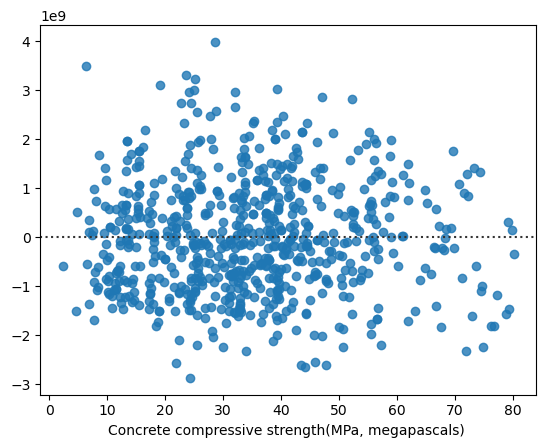

In [201]:
sns.residplot(x=y_train, y=y_pred_trial, data=concrete_data)

In [215]:
print("X train scaled", x_train_scaled.shape)
MLP.set_weights(best_position)
y_pred_trial_w= MLP.forward_pass(x_train_scaled)
print("before flattening", y_pred_trial_w.shape)
y_pred_trial_w = y_pred_trial_w.flatten()
print("after flattening", y_pred_trial_w.shape)
print(np.mean(np.abs((y_train - y_pred_trial_w))))


X train scaled (703, 8)
before flattening (703, 1)
after flattening (703,)
2519787973.4086685


/var/folders/mf/m37hd_vx2rd4zv4xvglmn6km0000gn/T/ipykernel_40125/1368158365.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

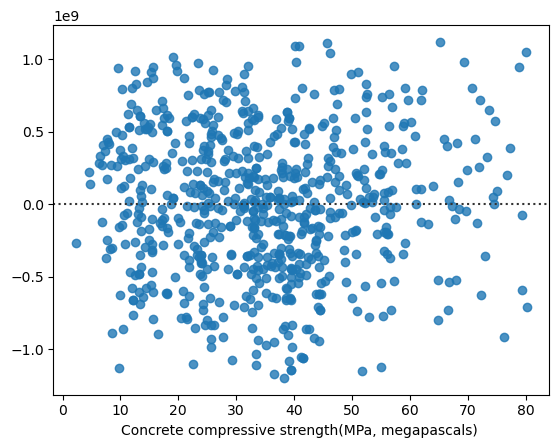

In [169]:
sns.residplot(x=y_train, y=y_pred_trial, data=concrete_data)

In [203]:
print("X test ", x_test.shape)
y_pred_test= MLP.forward_pass(x_test)
print("before flattening", y_pred_test.shape)
y_pred_test = y_pred_test.flatten()
print("after flattening", y_pred_test.shape)
print(np.mean(np.abs(y_test-y_pred_test)))

X test  (302, 8)
before flattening (302, 1)
after flattening (302,)
588208039.3177905


/var/folders/mf/m37hd_vx2rd4zv4xvglmn6km0000gn/T/ipykernel_40125/1368158365.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

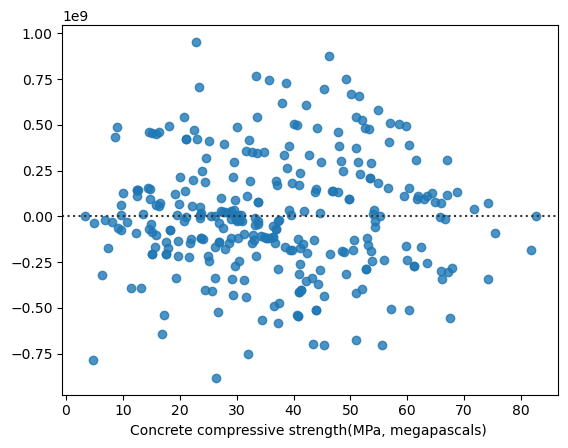

In [204]:
sns.residplot(x=y_test, y=y_pred_test, data=concrete_data)

# Test

In [ ]:
# Define edge case test function
def test_mlp_edge_cases(x_train_scaled):
    print("Testing MLP with different edge cases...\n")
 

# One hidden layer
    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[256], activation_function=logisitics_function)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("One hidden layer 256 neurons",mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")

    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[128], activation_function=logisitics_function)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("One hidden layer 128 neurons",mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")

    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[64], activation_function=logisitics_function)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("One hidden layer 64 neurons",mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")

    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[10], activation_function=logisitics_function)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("One hidden layer 10 neurons", mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")


   # Two hidden layer
    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[256, 128], activation_function=logisitics_function)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("Two hidden layers 256 and 128 neurons",mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")

    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[128, 64], activation_function=logisitics_function)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("Two hidden layers 128 and 64 neurons",mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")

    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[64,32], activation_function=logisitics_function)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("Two hidden layers 64 and 32 neurons",mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")

    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[10, 5], activation_function=logisitics_function)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("Two hidden layer 10 and 5neurons", mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")

     # Three hidden layers
    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[256, 128, 64], activation_function=logisitics_function)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("Three hidden layers 256 and 128 and 64 neurons",mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")
        

    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[128, 64, 32], activation_function=logisitics_function)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("Three hidden layers 128,64,32 neurons",mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")


In [ ]:
test_mlp_edge_cases(x_train_scaled)

In [ ]:
# Define edge case test function
def test_mlp_edge_cases(x_train_scaled):
    print("Testing MLP with different edge cases...\n")
 

# One hidden layer
    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[256], activation_function=RELU)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("One hidden layer 256 neurons",mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")

    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[128], activation_function=RELU)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("One hidden layer 128 neurons",mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")

    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[64], activation_function=RELU)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("One hidden layer 64 neurons",mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")

    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[10], activation_function=RELU)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("One hidden layer 10 neurons", mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")


   # Two hidden layer
    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[256, 128], activation_function=RELU)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("Two hidden layers 256 and 128 neurons",mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")

    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[128, 64], activation_function=RELU)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("Two hidden layers 128 and 64 neurons",mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")

    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[64,32], activation_function=RELU)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("Two hidden layers 64 and 32 neurons",mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")

    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[10, 5], activation_function=RELU)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("Two hidden layer 10 and 5neurons", mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")

     # Three hidden layers
    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[256, 128, 64], activation_function=RELU)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("Three hidden layers 256 and 128 and 64 neurons",mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")
        

    try:
        MLP = Multilayer_perceptron(hidden_layers_neurons=[128, 64, 32], activation_function=RELU)
        output = MLP.forward_pass(x_train_scaled)
        mse = np.mean((y_train - output.flatten()) ** 2)
        print("Three hidden layers 128,64,32 neurons",mse)
    except Exception as e:
        print(f"Empty input case failed: {e}")

In [ ]:
test_mlp_edge_cases(x_train_scaled)